Шаблон статистического исследования

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
from datetime import timedelta
from datetime import datetime
sns.set(rc={'figure.figsize' : (12, 5)}, font='verdana')
plt.style.use('dark_background')

In [6]:
url='https://drive.google.com/file/d/1ZnhQzDliRiOlrADRJV_ZTlxOqqsMo4sc/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url,sep = ';')
df_a = df[df.testgroup == 'a']
df_b = df[df.testgroup == 'b']

Проверяем параметры выборок

In [7]:
print(f'Группа А: \n\
Клиентов всего:       {len(df_a)}\n\
Заплативших клиентов: {len(df_a[df_a.revenue > 0])}    \n\
СR в оплату:          {round(len(df_a[df_a.revenue > 0]) / len(df_a), 4)} \n\
Средний чек:          {round(df_a[df_a.revenue > 0].revenue.sum() / len(df_a[df_a.revenue > 0]),1)} \n\
Самый большой заказ:  {df_a.revenue.max()}\n\
    ')

Группа А: 
Клиентов всего:       202103
Заплативших клиентов: 1928    
СR в оплату:          0.0095 
Средний чек:          2664.0 
Самый большой заказ:  37433
    


In [8]:
print(f'Группа B: \n\
Клиентов всего:       {len(df_b)}\n\
Заплативших клиентов: {len(df_b[df_b.revenue > 0])}    \n\
СR в оплату:          {round(len(df_b[df_b.revenue > 0]) / len(df_b), 4)} \n\
Средний чек:          {round(df_b[df_b.revenue > 0].revenue.sum() / len(df_b[df_b.revenue > 0]),1)} \n\
Самый большой заказ:  {df_b.revenue.max()}\n\
    ')

Группа B: 
Клиентов всего:       202667
Заплативших клиентов: 1805    
СR в оплату:          0.0089 
Средний чек:          3003.7 
Самый большой заказ:  4000
    


Посмотрим на распределения

<Figure size 1300x600 with 0 Axes>

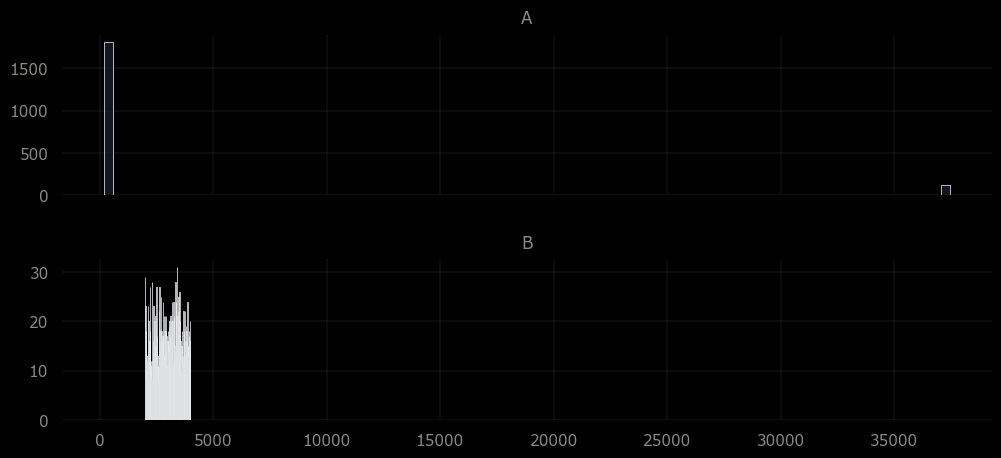

In [19]:
plt.figure(figsize=(13,6))
fig, ax = plt.subplots(2, 1, sharex=True)
plt.subplots_adjust(wspace= 0.2, 
                    hspace= 0.4)

plt.subplot(2, 1, 1)
sns.histplot(df_a[df_a.revenue > 0].revenue, linewidth=0.5,color='#171e2f',bins = 100)
plt.tick_params(axis='both', colors='#8b8a84')
plt.title('A', fontsize=12, y=1.02,color='#8b8a84')
plt.ylabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlabel("", labelpad = 5, fontsize= 11, color='#8b8a84')


for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.subplot(2, 1, 2)
sns.histplot(df_b[df_b.revenue > 0].revenue, linewidth=0.5,color='#171e2f',bins = 100)
plt.tick_params(axis='both', colors='#8b8a84')
plt.title('B', fontsize=12, y=1.02,color='#8b8a84')
plt.ylabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlabel("", labelpad = 5, fontsize= 11, color='#8b8a84')

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.show()

Определяем нормальность распределений и размер дисперсий:

- Дисперсии обоих распределений должны быть примерно одинаковы (критерий Левена и критерий Фишера)

- Оба распределения должны быть нормальными ()


In [18]:
pg.mwu(df_a.revenue, df_b.revenue, alternative='two-sided')

MemoryError: Unable to allocate 305. GiB for an array with shape (202103, 202667) and data type int64

In [18]:
t

revenue    False
Name: normal, dtype: bool